In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv (r'/kaggle/input/air-filter-data/air_filter_data.csv')
df.head()

,timestamp,filter_name,location,filter_class,filter_age_days,load_factor,pressure_drop_pa,efficiency,inlet_pm25,outlet_pm25,inlet_pm10,outlet_pm10,replacement_needed,hour
0,2022-08-28 03:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,23.54,0.408784,60.7,0.870,47.7,6.2,88.3,11.4,0,3
1,2023-06-08 17:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,5.46,0.309243,95.0,0.981,71.3,1.4,75.8,2.0,0,17
2,2022-09-14 05:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,23.50,0.312394,114.9,0.962,67.4,2.6,98.9,3.8,0,5
3,2021-01-16 09:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,4.04,0.420890,25.1,0.893,69.2,7.4,57.8,6.2,0,9
4,2021-06-01 14:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,1.88,0.200000,83.7,0.992,45.3,1.0,66.4,2.0,0,14


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21915 entries, 0 to 21914
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           21915 non-null  object 
 1   filter_name         21915 non-null  object 
 2   location            21915 non-null  object 
 3   filter_class        21915 non-null  object 
 4   filter_age_days     21915 non-null  float64
 5   load_factor         21915 non-null  float64
 6   pressure_drop_pa    21915 non-null  float64
 7   efficiency          21915 non-null  float64
 8   inlet_pm25          21915 non-null  float64
 9   outlet_pm25         21915 non-null  float64
 10  inlet_pm10          21915 non-null  float64
 11  outlet_pm10         21915 non-null  float64
 12  replacement_needed  21915 non-null  int64  
 13  hour                21915 non-null  int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 2.3+ MB


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [5]:
df.head()

,timestamp,filter_name,location,filter_class,filter_age_days,load_factor,pressure_drop_pa,efficiency,inlet_pm25,outlet_pm25,inlet_pm10,outlet_pm10,replacement_needed,hour
0,2022-08-28 03:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,23.54,0.408784,60.7,0.870,47.7,6.2,88.3,11.4,0,3
1,2023-06-08 17:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,5.46,0.309243,95.0,0.981,71.3,1.4,75.8,2.0,0,17
2,2022-09-14 05:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,23.50,0.312394,114.9,0.962,67.4,2.6,98.9,3.8,0,5
3,2021-01-16 09:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,4.04,0.420890,25.1,0.893,69.2,7.4,57.8,6.2,0,9
4,2021-06-01 14:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,1.88,0.200000,83.7,0.992,45.3,1.0,66.4,2.0,0,14


In [6]:
df.isna().sum()

timestamp             0
filter_name           0
location              0
filter_class          0
filter_age_days       0
load_factor           0
pressure_drop_pa      0
efficiency            0
inlet_pm25            0
outlet_pm25           0
inlet_pm10            0
outlet_pm10           0
replacement_needed    0
hour                  0
dtype: int64

In [7]:
df['year'] = df['timestamp'].dt.year

print(df[['timestamp', 'year']].head())

            timestamp  year
0 2022-08-28 03:00:00  2022
1 2023-06-08 17:00:00  2023
2 2022-09-14 05:00:00  2022
3 2021-01-16 09:00:00  2021
4 2021-06-01 14:00:00  2021


In [8]:
df['replacement_needed'].unique()

array([0, 1])

In [9]:
df["day_of_week"] = df["timestamp"].dt.day_name()
df.head()

,timestamp,filter_name,location,filter_class,filter_age_days,load_factor,pressure_drop_pa,efficiency,inlet_pm25,outlet_pm25,inlet_pm10,outlet_pm10,replacement_needed,hour,year,day_of_week
0,2022-08-28 03:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,23.54,0.408784,60.7,0.870,47.7,6.2,88.3,11.4,0,3,2022,Sunday
1,2023-06-08 17:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,5.46,0.309243,95.0,0.981,71.3,1.4,75.8,2.0,0,17,2023,Thursday
2,2022-09-14 05:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,23.50,0.312394,114.9,0.962,67.4,2.6,98.9,3.8,0,5,2022,Wednesday
3,2021-01-16 09:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,4.04,0.420890,25.1,0.893,69.2,7.4,57.8,6.2,0,9,2021,Saturday
4,2021-06-01 14:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,1.88,0.200000,83.7,0.992,45.3,1.0,66.4,2.0,0,14,2021,Tuesday


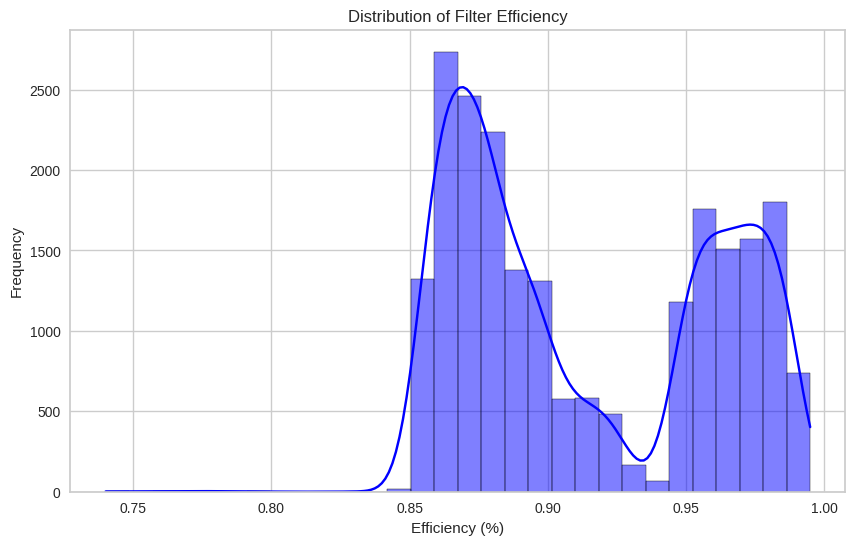

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['efficiency'] ,bins=30, kde=True, color='blue')
plt.title('Distribution of Filter Efficiency')
plt.xlabel('Efficiency (%)')
plt.ylabel('Frequency')

plt.show()

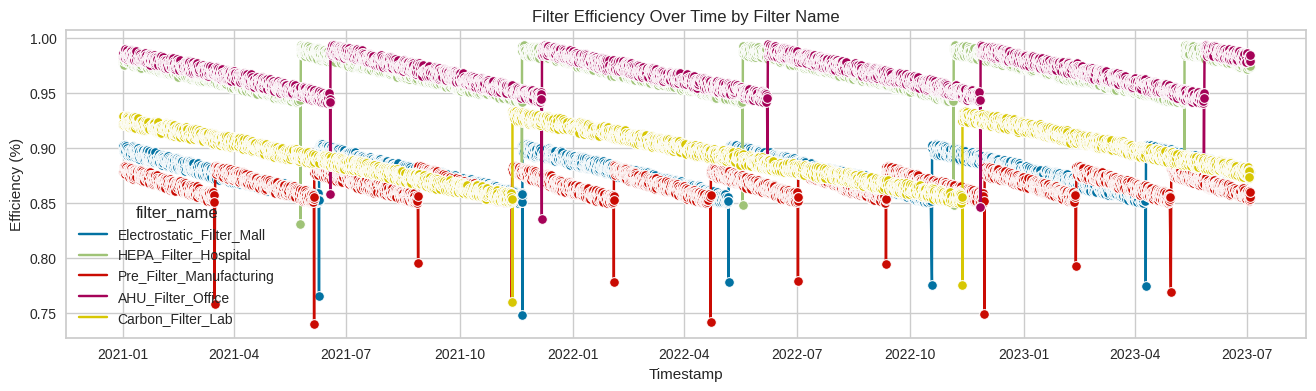

In [11]:
plt.figure(figsize=(16, 4))
sns.lineplot(x='timestamp', y='efficiency', hue='filter_name', data=df, marker='o')
plt.title('Filter Efficiency Over Time by Filter Name')
plt.xlabel('Timestamp')
plt.ylabel('Efficiency (%)')
# plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

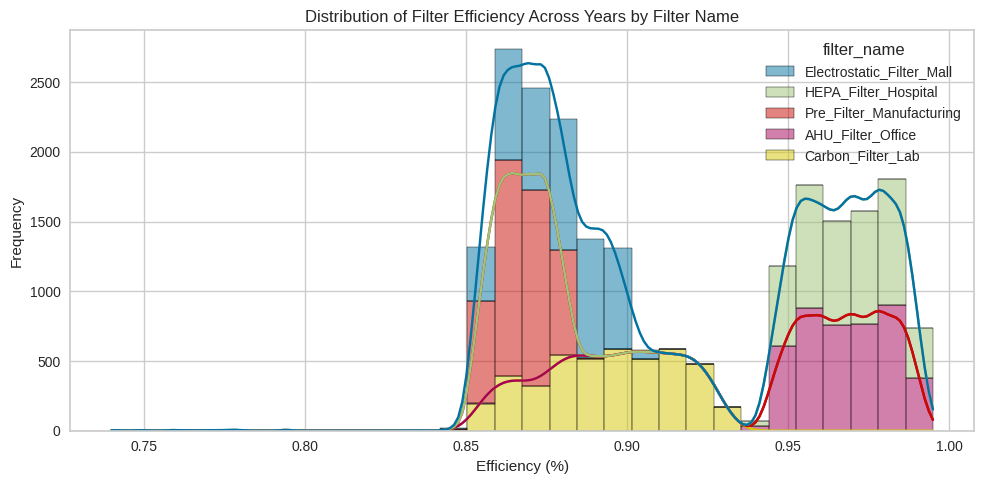

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x='efficiency', hue='filter_name', kde=True, multiple="stack", bins=30, hue_order=df['filter_name'].unique())
plt.title('Distribution of Filter Efficiency Across Years by Filter Name')
plt.xlabel('Efficiency (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


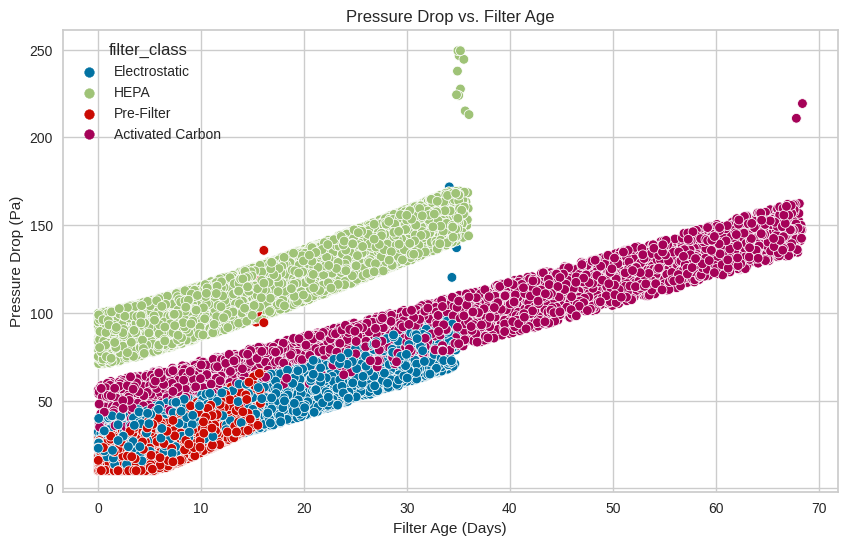

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="filter_age_days", y="pressure_drop_pa", hue="filter_class", data=df)
plt.title("Pressure Drop vs. Filter Age")
plt.xlabel("Filter Age (Days)")
plt.ylabel("Pressure Drop (Pa)")
plt.show()

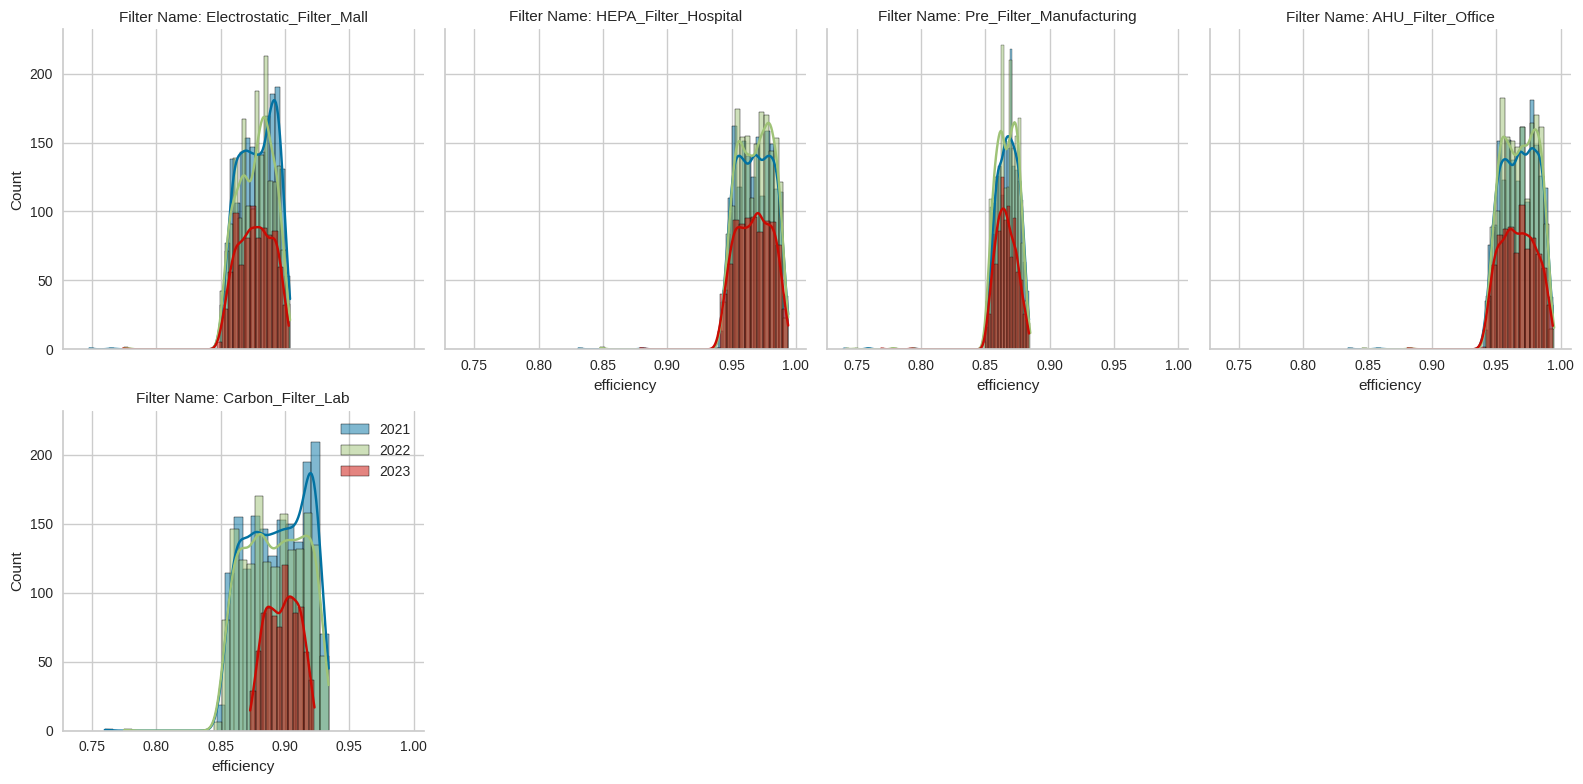

In [14]:
g = sns.FacetGrid(df, col="filter_name", hue="year", col_wrap=4, height=4)
g.map(sns.histplot, 'efficiency', kde=True)
g.set_titles('Filter Name: {col_name}')
plt.tight_layout()
plt.legend()
plt.show()


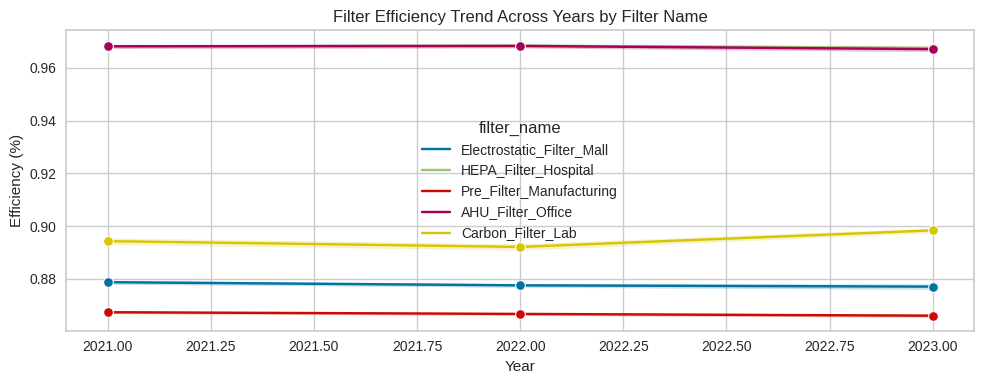

In [15]:
plt.figure(figsize=(10, 4))
sns.lineplot(x='year', y='efficiency', hue='filter_name', data=df, marker='o')
plt.title('Filter Efficiency Trend Across Years by Filter Name')
plt.xlabel('Year')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()


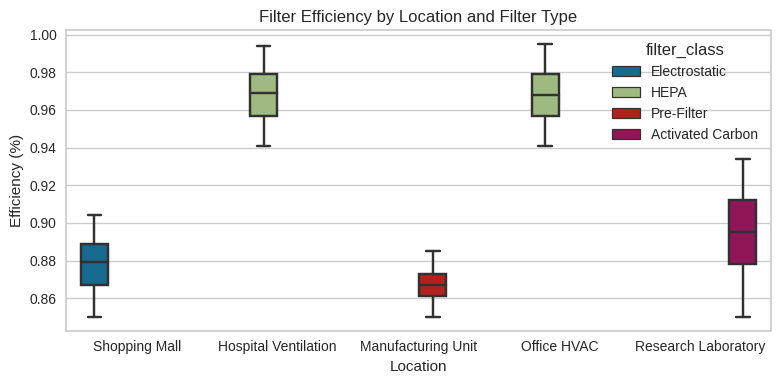

In [16]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='location', y='efficiency', hue='filter_class',showfliers=False, data=df)
plt.title('Filter Efficiency by Location and Filter Type')
plt.xlabel('Location')
plt.ylabel('Efficiency (%)')
plt.tight_layout()
plt.show()


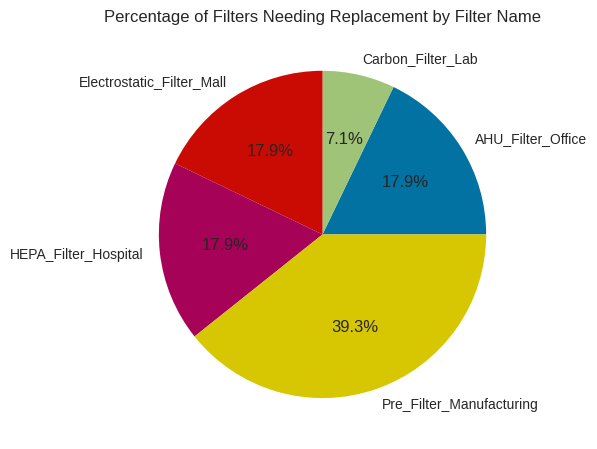

In [17]:
plt.figure(figsize=(6, 6))
replacement_counts = df.groupby('filter_name')['replacement_needed'].sum()
plt.pie(replacement_counts, autopct='%1.1f%%',labels=replacement_counts.index)
plt.title('Percentage of Filters Needing Replacement by Filter Name')
plt.tight_layout()
plt.show()


In [18]:
print(df["replacement_needed"].value_counts())

replacement_needed
0    21887
1       28
Name: count, dtype: int64
